In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from random import random
import numpy as np

In [59]:
df = pd.read_csv("SpotifyData.csv")

In [60]:
#grouped.drop(['instrumentalness', 'acousticness', 'speechiness', 'key', 'mode', 'danceability', "artist", "song", "liveness"], axis = 1, inplace=True)
df.dropna(axis=0, inplace=True)
df['duration'] = df['duration'] / 1000
df.drop(df[df['popularity']<= 40].index, inplace=True)
df

,artist,song,duration,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,211.160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,blink-182,All The Small Things,167.066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,Faith Hill,Breathe,250.546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,Bon Jovi,It's My Life,224.493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,*NSYNC,Bye Bye Bye,200.560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181.026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,Taylor Swift,Cruel Summer,178.426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,Blanco Brown,The Git Up,200.593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,Sam Smith,Dancing With A Stranger (with Normani),171.029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [61]:

y = df['popularity'].values
X = df[['duration', 'year', 'energy', 'loudness', 'valence', 'tempo']].values
print(X.tolist())

[[211.16, 2000.0, 0.834, -5.444, 0.894, 95.053], [167.066, 1999.0, 0.897, -4.918, 0.684, 148.726], [250.546, 1999.0, 0.496, -9.007, 0.278, 136.859], [224.493, 2000.0, 0.913, -4.063, 0.544, 119.992], [200.56, 2000.0, 0.928, -4.806, 0.879, 172.656], [253.733, 1999.0, 0.888, -6.959, 0.714, 121.549], [284.2, 2000.0, 0.661, -4.244, 0.76, 104.504], [258.56, 2000.0, 0.772, -4.264, 0.861, 103.035], [271.333, 1999.0, 0.678, -3.525, 0.734, 138.009], [307.153, 2001.0, 0.808, -5.627, 0.869, 126.041], [268.863, 1999.0, 0.958, -9.664, 0.96, 129.962], [306.333, 2000.0, 0.922, -5.798, 0.568, 163.826], [285.96, 1999.0, 0.659, -7.92, 0.147, 111.989], [294.2, 1999.0, 0.685, -5.153, 0.398, 160.067], [284.0, 2002.0, 0.622, -5.642, 0.731, 93.02], [245.4, 1999.0, 0.716, -5.8, 0.649, 119.41], [214.883, 2000.0, 0.88, -6.149, 0.782, 136.953], [285.426, 1999.0, 0.876, -6.87, 0.825, 127.002], [161.506, 1999.0, 0.909, -2.429, 0.309, 95.295], [216.88, 2000.0, 0.864, -5.87, 0.4, 105.143], [211.893, 1999.0, 0.876, -3

In [62]:
length = len(df.index)
split = int(length * 0.7)
X_train = X[:split]
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = X[split:]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
y_train = y[:split]
y_test = y[split:]
print(y_train)


[77 79 66 ... 73 56 65]


In [63]:
coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
intercept = coefficients[0]
coefficients = coefficients[1:]
print(intercept)

print(coefficients)

-502.8966267327269
[ 3.22317700e-04  2.85391270e-01 -3.12601561e+00  7.23131164e-01
 -8.77605231e-01  1.27141707e-02]


In [64]:
print(X_test.shape)
print(np.concatenate(([intercept], coefficients)))

(534, 7)
[-5.02896627e+02  3.22317700e-04  2.85391270e-01 -3.12601561e+00
  7.23131164e-01 -8.77605231e-01  1.27141707e-02]


In [75]:
y_pred = X_test @ np.concatenate(([intercept], coefficients))

ytest_list = y_test.tolist()
ypred_list = y_pred.tolist()


ExactlyCorrect = 0
for actual, prediction in zip(ytest_list, ypred_list):
    print(f"Actual: {actual}, Prediction: {prediction}")
    if actual == int(prediction):
        ExactlyCorrect+= 1

print()       
print(f"NUmber of times Prediction correctly predicted exact acutal number: {ExactlyCorrect}")
        


Actual: 62, Prediction: 66.75314663609959
Actual: 72, Prediction: 66.40279916464517
Actual: 61, Prediction: 67.07738655642176
Actual: 74, Prediction: 65.93329348090937
Actual: 76, Prediction: 67.83971075506182
Actual: 57, Prediction: 66.45290267041908
Actual: 77, Prediction: 67.03888059413879
Actual: 69, Prediction: 64.67133422964856
Actual: 66, Prediction: 66.80944959982344
Actual: 78, Prediction: 65.8609556258385
Actual: 78, Prediction: 66.03957000763025
Actual: 79, Prediction: 66.22959686070493
Actual: 78, Prediction: 66.12873967368257
Actual: 79, Prediction: 67.11705592782856
Actual: 59, Prediction: 67.20894792471834
Actual: 72, Prediction: 66.01577585436263
Actual: 66, Prediction: 66.52039670849464
Actual: 68, Prediction: 65.0979640786957
Actual: 73, Prediction: 65.14670685437498
Actual: 65, Prediction: 66.89491343397601
Actual: 76, Prediction: 64.38214832890456
Actual: 67, Prediction: 68.07423459088577
Actual: 83, Prediction: 64.83650052415501
Actual: 57, Prediction: 67.093043811

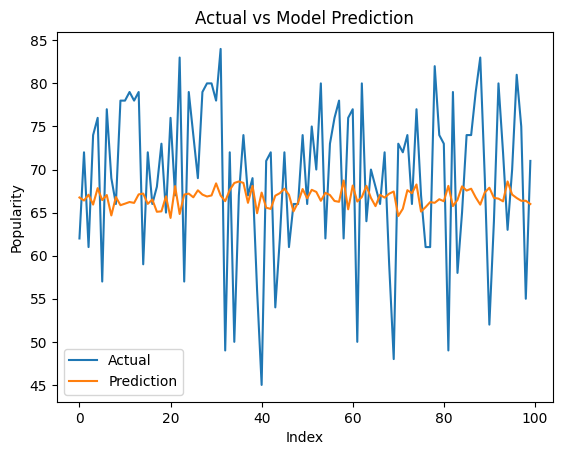

In [66]:


plt.plot([x for x in range(100)], ytest_list[:100], label='Actual')
plt.plot([x for x in range(100)], ypred_list[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.title('Actual vs Model Prediction')

plt.legend()
plt.show()

In [67]:
for i in range(len(X_test)):
    mse = ((y_test[i] - y_pred[i])**2)/len(X_test)
print(mse)

0.4494512859510621


In [68]:
print(X_test)

[[ 1.00000e+00  3.38413e+02  2.01300e+03 ... -6.90100e+00  1.56000e-01
   1.45082e+02]
 [ 1.00000e+00  2.00946e+02  2.01200e+03 ... -3.83500e+00  7.48000e-01
   9.30430e+01]
 [ 1.00000e+00  2.20682e+02  2.01300e+03 ... -4.75100e+00  6.89000e-01
   1.23973e+02]
 ...
 [ 1.00000e+00  2.00593e+02  2.01900e+03 ... -8.63500e+00  8.11000e-01
   9.79840e+01]
 [ 1.00000e+00  1.71029e+02  2.01900e+03 ... -7.51300e+00  3.47000e-01
   1.02998e+02]
 [ 1.00000e+00  2.15280e+02  2.01900e+03 ... -3.49700e+00  5.53000e-01
   1.20042e+02]]


In [69]:
"""Moment of truth! How popular will the following song be?
artistGAYLE
song:abcdefu
duration:168602
year:2021
danceability:0.695
energy:0.54
key:4
loudness:-5.692
mode:1
speechiness:0.0493
acousticness:0.299
instrumentalness:0.0
liveness:0.367
valence:121.932
tempo:122.975
popularity:
????"""

duration = 168.602
year=2021
energy = 0.54
loudness = -5.692
valence =121.932
tempo = 122.975

weights = np.concatenate(([intercept], coefficients))
weights = weights.tolist()
print(weights)

for i in range(len(weights)):
    popularity = weights[0] + (weights[1] * duration)+ (weights[2] * year)+ (weights[3] * energy)+ (weights[4] * loudness)+ (weights[5] * valence)+ (weights[6] * tempo)

print(popularity)

[-502.8966267327269, 0.0003223177003462349, 0.2853912699772, -3.126015607327991, 0.7231311638693352, -0.8776052313735969, 0.012714170724592345]
-37.31527363958193


In [70]:
# Generate some test data
"""X_test = np.array([[5, 11], [6, 13], [7, 15]])
y_test = np.array([14, 16, 18])

print(y_test.shape)

coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
# Add a column of ones to X_test for the intercept
x = np.linalg.inv(X_test.T @ X_test)@ X_test.T
print(X_test)
print()
print(X_test.T)
print()
print(X_test.T @ X_test)
print()
print((np.linalg.inv(X_test.T @ X_test)))
print()
print((np.linalg.inv(X_test.T @ X_test))@ X_test.T)
print()
print(x.shape)
print(y_test.shape)
print(y_test)
print()
print((np.linalg.inv(X_test.T @ X_test))@ X_test.T @ y_test)"""



'X_test = np.array([[5, 11], [6, 13], [7, 15]])\ny_test = np.array([14, 16, 18])\n\nprint(y_test.shape)\n\ncoefficients = np.linalg.inv(X.T @ X) @ X.T @ y\n# Add a column of ones to X_test for the intercept\nx = np.linalg.inv(X_test.T @ X_test)@ X_test.T\nprint(X_test)\nprint()\nprint(X_test.T)\nprint()\nprint(X_test.T @ X_test)\nprint()\nprint((np.linalg.inv(X_test.T @ X_test)))\nprint()\nprint((np.linalg.inv(X_test.T @ X_test))@ X_test.T)\nprint()\nprint(x.shape)\nprint(y_test.shape)\nprint(y_test)\nprint()\nprint((np.linalg.inv(X_test.T @ X_test))@ X_test.T @ y_test)'

In [73]:
"""y_test = np.array([[14, 16, 18], [13, 15, 22]])
print(y_test)

print(y_test.shape)"""

'y_test = np.array([[14, 16, 18], [13, 15, 22]])\nprint(y_test)\n\nprint(y_test.shape)'